In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
cat=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [9]:
for i in cat:
    print(df[i].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [10]:
for i in cat:
    print(f"{i}---------{df[i].unique()}")

Sex---------['M' 'F']
ChestPainType---------['ATA' 'NAP' 'ASY' 'TA']
RestingECG---------['Normal' 'ST' 'LVH']
ExerciseAngina---------['N' 'Y']
ST_Slope---------['Up' 'Flat' 'Down']


In [11]:
df=pd.get_dummies(df,drop_first=True)

In [12]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [13]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.215793,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.046153,-0.041348,0.049855,-0.116851,0.090447,0.155101,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092,0.150954,-0.006634,0.017365,-0.038470,-0.133106,-0.034166,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.060451,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.370425,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.408752,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.401924,-0.212964,-0.054790,-0.091580,0.102527,0.494282,0.554134,-0.622164
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.190664,0.116077,-0.150942
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.161522,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.300365,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.066486,-0.256767,1.000000,-0.122381,0.005010,-0.042236,-0.166030,-0.072031,0.093583


<AxesSubplot:>

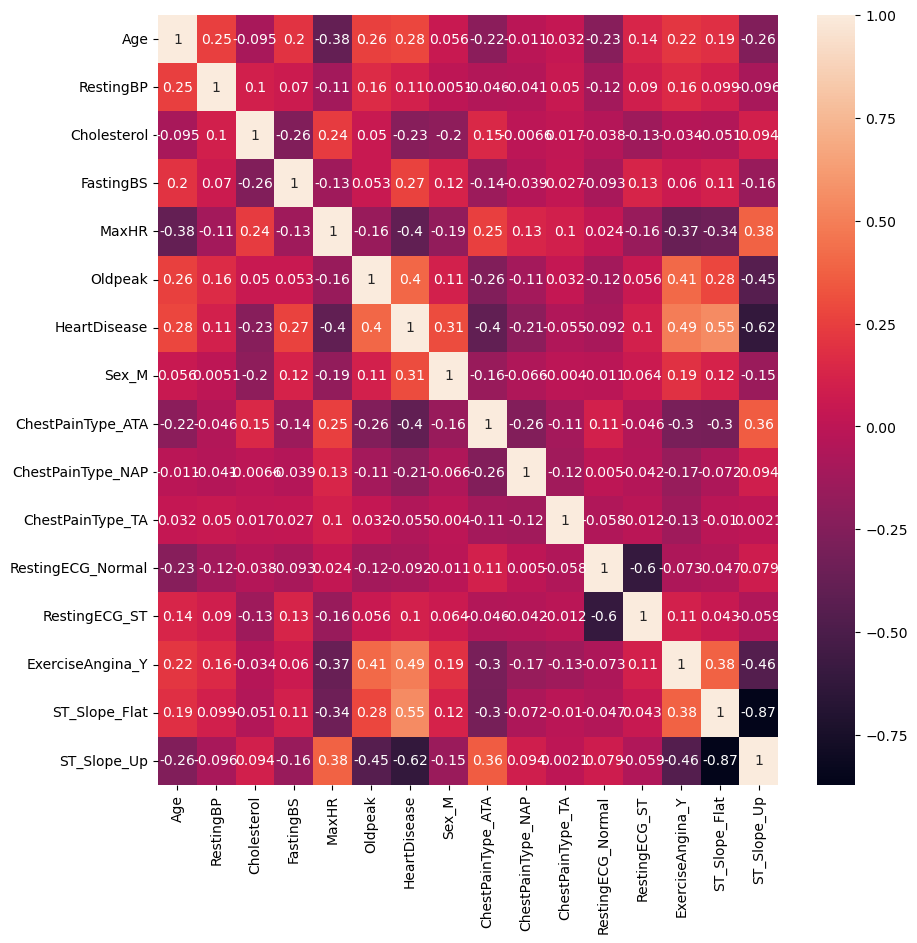

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [16]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [20]:
x_scaled=scaler.fit_transform(x)

In [21]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [22]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.515952,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,-1.938163,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.515952,2.075177,-0.532838,-0.229679,-1.228087,2.038947,-0.823556,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,-1.938163,-0.481887,-0.532838,-0.229679,0.814275,-0.490449,1.214246,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.515952,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [26]:
x_train.shape


(688, 15)

In [27]:
x_test.shape

(230, 15)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model=KNeighborsClassifier(n_neighbors=31)

In [56]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [57]:
model.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8648255813953488

In [58]:
predicted=model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [59]:
accuracy_score(y_test,predicted)

0.9130434782608695

In [60]:
confusion_matrix(y_test,predicted)

array([[ 88,   9],
       [ 11, 122]], dtype=int64)

<AxesSubplot:>

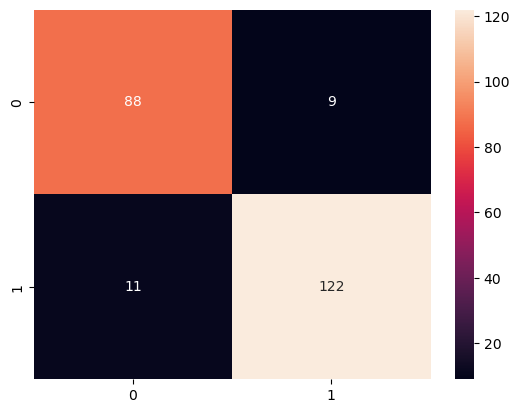

In [61]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [62]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        97
           1       0.93      0.92      0.92       133

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



Elbow Method for Determining Value of K

In [51]:
error_rate=[]
for i in range(1,49):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [52]:
error_rate

[0.14347826086956522,
 0.16521739130434782,
 0.10869565217391304,
 0.13478260869565217,
 0.10434782608695652,
 0.11739130434782609,
 0.09565217391304348,
 0.1,
 0.09565217391304348,
 0.09130434782608696,
 0.08260869565217391,
 0.08695652173913043,
 0.08695652173913043,
 0.09130434782608696,
 0.09130434782608696,
 0.09565217391304348,
 0.09130434782608696,
 0.1,
 0.10434782608695652,
 0.09565217391304348,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09565217391304348,
 0.09130434782608696,
 0.09565217391304348,
 0.09130434782608696,
 0.09130434782608696,
 0.08695652173913043,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09565217391304348,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09130434782608696,
 0.09565217391304348,
 0.09565217391304348,
 0.09565217391304348,
 0.09565217391304348

In [53]:
len(error_rate)

48

<AxesSubplot:>

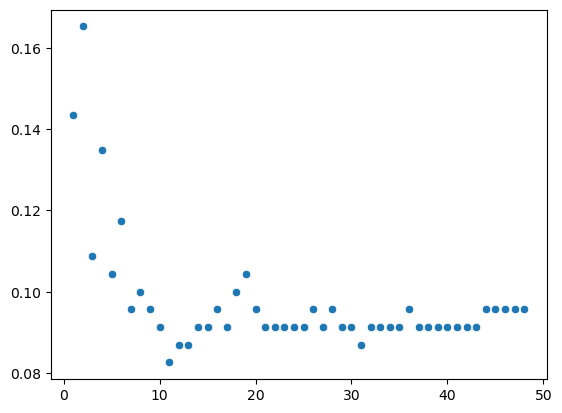

In [54]:
sns.scatterplot(x=range(1,49),y=error_rate)